In [72]:
import numpy as np
import sys
import pickle
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import statsmodels.discrete.discrete_model as sm

# from sklearn import cross_validation
import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', 200)
plt.rcParams['figure.figsize']=(20,20)

In [3]:
dataset = pd.read_csv('./data/datasets/radiomics_features.csv', delimiter=";")
print(dataset.columns)

Index(['Unnamed: 0', 'diagnostics_Versions_PyRadiomics',
       'diagnostics_Versions_Numpy', 'diagnostics_Versions_SimpleITK',
       'diagnostics_Versions_PyWavelet', 'diagnostics_Versions_Python',
       'diagnostics_Configuration_Settings',
       'diagnostics_Configuration_EnabledImageTypes',
       'diagnostics_Image-original_Hash', 'diagnostics_Image-original_Spacing',
       ...
       'original_gldm_HighGrayLevelEmphasis',
       'original_gldm_LargeDependenceEmphasis',
       'original_gldm_LargeDependenceHighGrayLevelEmphasis',
       'original_gldm_LargeDependenceLowGrayLevelEmphasis',
       'original_gldm_LowGrayLevelEmphasis',
       'original_gldm_SmallDependenceEmphasis',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis', 'data_source',
       'diagnosis_code'],
      dtype='object', length=101)


In [4]:
glrlm_features = [
    'original_glrlm_GrayLevelNonUniformity',
    'original_glrlm_GrayLevelNonUniformityNormalized',
    'original_glrlm_GrayLevelVariance',
    'original_glrlm_HighGrayLevelRunEmphasis',
    'original_glrlm_LongRunEmphasis',
    'original_glrlm_LongRunHighGrayLevelEmphasis',
    'original_glrlm_LongRunLowGrayLevelEmphasis',
    'original_glrlm_LowGrayLevelRunEmphasis',
    'original_glrlm_RunEntropy',
    'original_glrlm_RunLengthNonUniformity',
    'original_glrlm_RunLengthNonUniformityNormalized',
    'original_glrlm_RunPercentage',
    'original_glrlm_RunVariance',
    'original_glrlm_ShortRunEmphasis',
    'original_glrlm_ShortRunHighGrayLevelEmphasis',
    'original_glrlm_ShortRunLowGrayLevelEmphasis',
    'diagnosis_code'
]

target_names = [
    'norm',
    "auh",
    "dsh",
    "hpb",
    "hpc",
    "wls"
]

important_features = [
    'original_glrlm_GrayLevelNonUniformity',
    'original_glrlm_GrayLevelNonUniformityNormalized',
    'original_glrlm_GrayLevelVariance',
    'original_glrlm_LongRunHighGrayLevelEmphasis',
    'original_glrlm_LongRunLowGrayLevelEmphasis',
    'original_glrlm_RunEntropy',
    'original_glrlm_RunLengthNonUniformity',
    'original_glrlm_ShortRunEmphasis',
    'diagnosis_code'
]

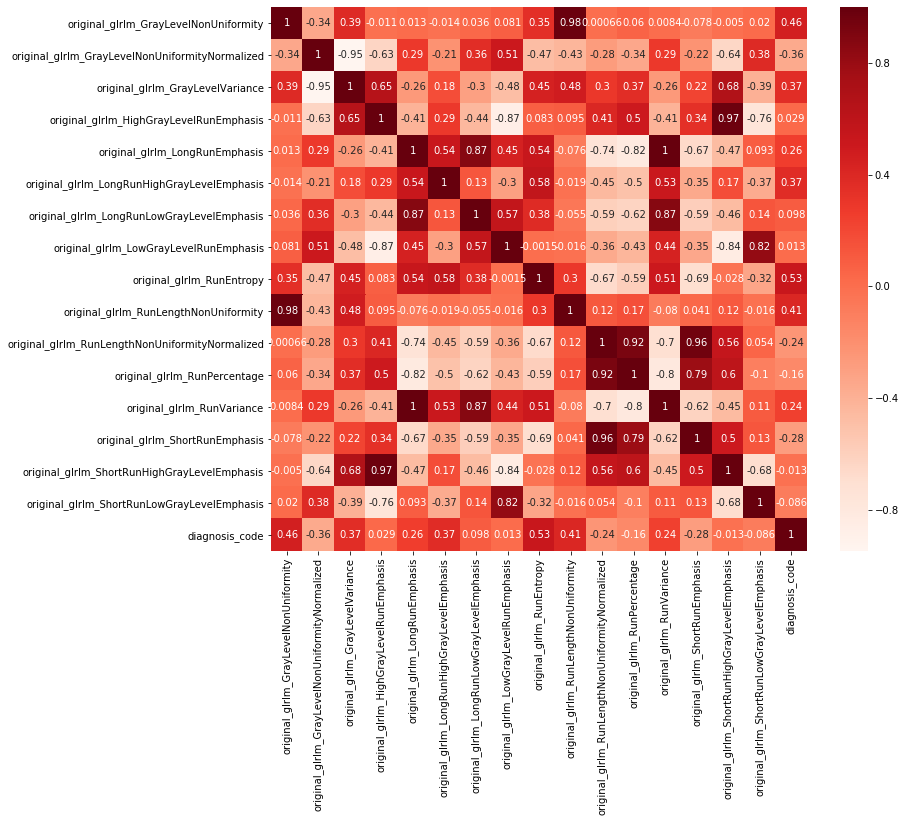

In [5]:
plt.figure(figsize=(12,10))
cor = dataset[glrlm_features].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
glrlm_data = dataset[glrlm_features]
glrlm_data.head()

,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,diagnosis_code
0,635.753957,0.386393,0.496164,8.268450,35.813432,288.762641,5.060246,0.158820,4.497523,311.977481,0.184203,0.260483,20.093459,0.395367,3.289589,0.068192,0
1,100.800524,0.442746,0.394778,4.750947,98.657191,397.543169,24.777872,0.334272,4.352583,33.633307,0.144202,0.162536,57.144109,0.357881,1.848319,0.162828,0
2,203.260491,0.371405,0.534773,8.789703,20.836573,162.810393,3.144840,0.151618,4.285351,119.509055,0.209518,0.315380,9.630667,0.425230,3.967911,0.065593,0
3,468.332549,0.441406,0.375363,6.396881,52.591406,280.362610,11.312171,0.213631,4.590949,161.579461,0.142472,0.230447,26.613673,0.313535,2.136343,0.075928,0
4,204.505786,0.402929,0.450018,5.116707,77.439949,316.954686,20.285264,0.323571,4.638538,76.931386,0.145197,0.184493,45.386818,0.353462,1.941529,0.142502,0


In [27]:
from sklearn.decomposition import KernelPCA
print(X.shape)
pca = KernelPCA(n_components=15, kernel='poly')
X_PCA = pca.fit_transform(X)
# principalComponents

(109, 16)


# Scaling Data

In [28]:
from sklearn.preprocessing import StandardScaler

X = glrlm_data.iloc[:, :-1]
Y = glrlm_data.iloc[:, -1]

X_norm = StandardScaler().fit_transform(X)


In [1]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import SelectKBest, chi2

Best alpha using built-in LassoCV: 0.100000
Best score using built-in LassoCV: 0.548734
Lasso picked 16 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Ridge Model')

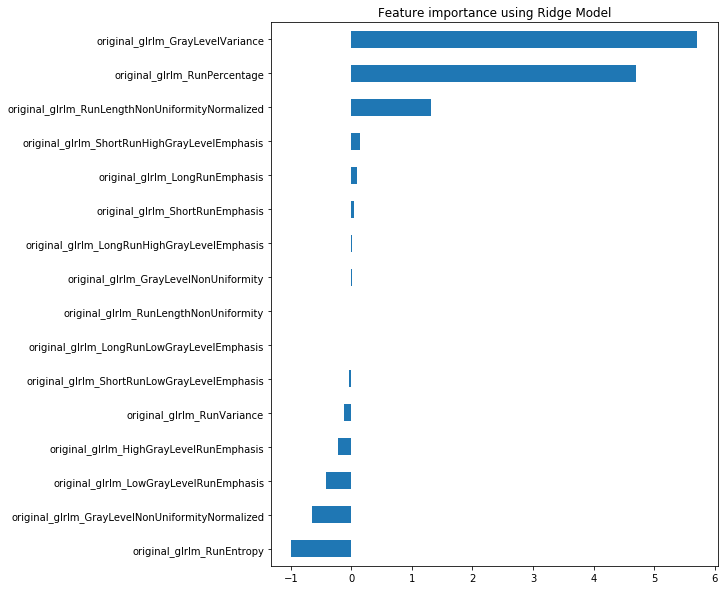

In [83]:
reg = RidgeCV()
reg.fit(X, Y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,Y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

In [89]:
ridge_important_features = [
    'original_glrlm_GrayLevelVariance',
    'original_glrlm_RunPercentage',
    'original_glrlm_RunLengthNonUniformityNormalized',
    'original_glrlm_RunEntropy',
    'original_glrlm_GrayLevelNonUniformityNormalized',
    'diagnosis_code'
]

# Select Important Features using Ridge model

In [90]:
glrlm_data = dataset[ridge_important_features]
glrlm_data.head()

,original_glrlm_GrayLevelVariance,original_glrlm_RunPercentage,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunEntropy,original_glrlm_GrayLevelNonUniformityNormalized,diagnosis_code
0,0.496164,0.260483,0.184203,4.497523,0.386393,0
1,0.394778,0.162536,0.144202,4.352583,0.442746,0
2,0.534773,0.315380,0.209518,4.285351,0.371405,0
3,0.375363,0.230447,0.142472,4.590949,0.441406,0
4,0.450018,0.184493,0.145197,4.638538,0.402929,0


/Users/ikachko/vcub/lib/python3.7/site-packages/seaborn/axisgrid.py:1306: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


ValueError: color kwarg must have one color per data set. 6 data sets and 1 colors were provided

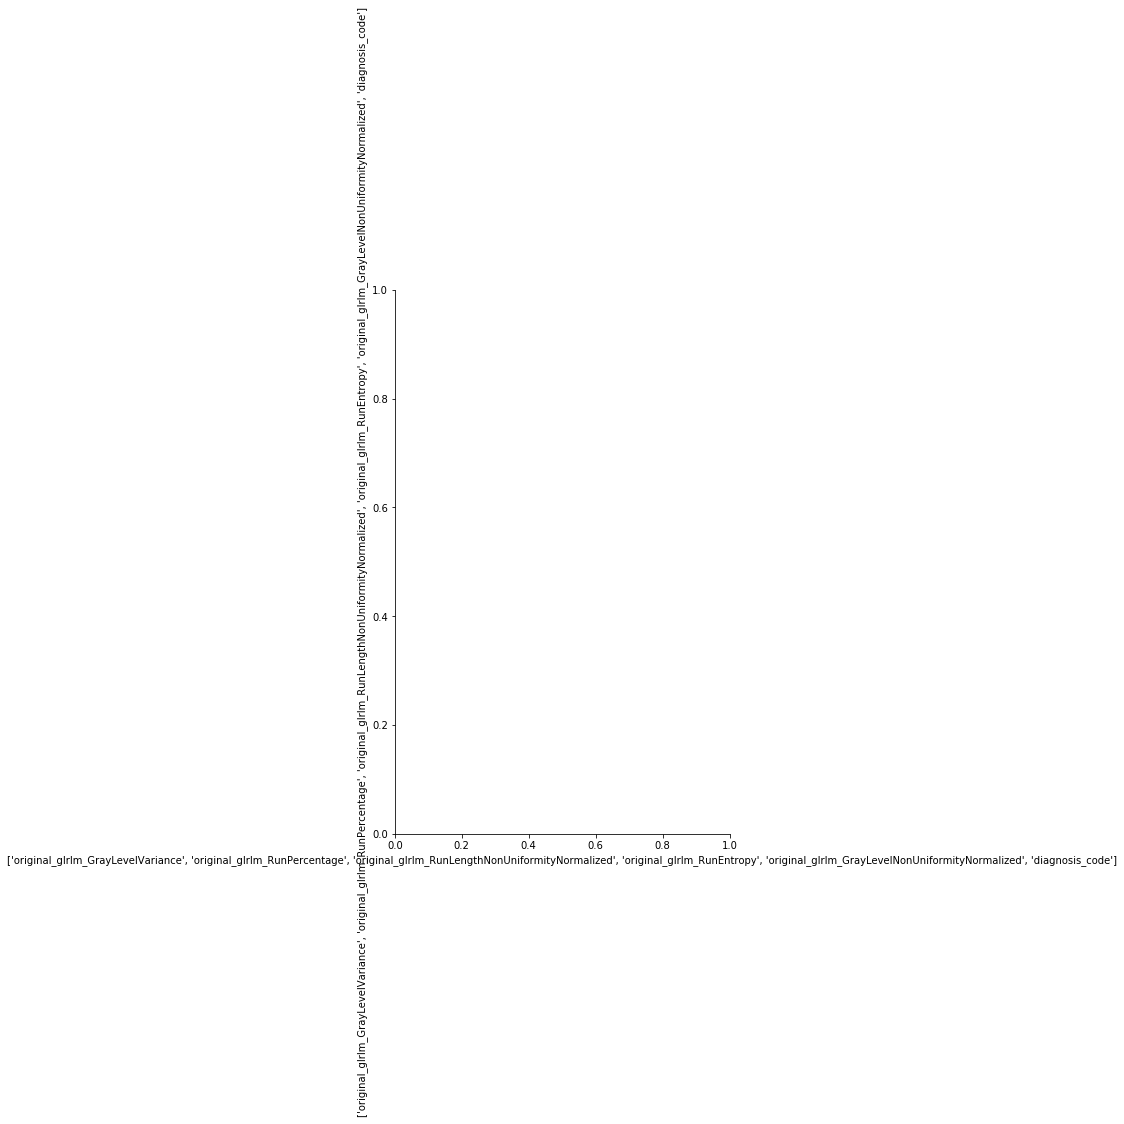

In [91]:
import seaborn as sns
# sns.pairplot(glrlm_data.iloc[:, :-1])
g = sns.PairGrid(glrlm_data,
                 vars=[
                        'original_glrlm_GrayLevelNonUniformityNormalized',
                        'original_glrlm_GrayLevelVariance',
                        'original_glrlm_LongRunHighGrayLevelEmphasis',
                        'original_glrlm_LongRunLowGrayLevelEmphasis',
                        'original_glrlm_RunEntropy'
                 ],
                 hue='diagnosis_code',
                 height=10,
                 aspect=0.6,
                 palette="Paired")
# g.map_diag(sns.kdeplot)
# g.map_offdiag(plt.scatter)
# g.map(plt.scatter)
g.map_diag(plt.hist, histtype="step", linewidth=3)
g.fig.set_size_inches(15,15)

g.map_offdiag(plt.scatter)
g.add_legend()
# g.map_offdiag(sns.kdeplot, n_levels=3)

# Data preparation

In [75]:
X = glrlm_data.iloc[:, :-1]
Y = glrlm_data.iloc[:, -1]
seed = 2
test_size = 0.25

# Recursive Feature Elimination

In [6]:
from sklearn.feature_selection import RFE

# MLP Model

In [95]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

clf = MLPClassifier(solver='lbfgs', alpha=0.001, hidden_layer_sizes=(1,), random_state=seed, max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# print(clf.pvalues)


Accuracy: 71.43%


# Naive Bayes Model

In [96]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=1)

model = GaussianNB()

model.fit(X_train, y_train)

print(accuracy_score(y_test, model.predict(X_test)))

0.7142857142857143


# K-Nearest Neighbours

In [111]:
from sklearn.neighbors import KNeighborsClassifier

X = glrlm_data.iloc[:, :-1]
Y = glrlm_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

rfe = RFE(model, 8)
fit = rfe.fit(X, Y)

RCE_selected_features = get_RCE_selected_features(fit)
RCE_selected_data = dataset[RCE_selected_features + ['diagnosis_code']]

X = RCE_selected_data.iloc[:, :-1]
Y = RCE_selected_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model.fit(X_train, y_train)


accuracy = accuracy_score(y_test, neig.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

# Support Vector Machine

In [110]:
from sklearn import svm
# dataset = pd.read_csv('./datasets/glrlm_0_sep_diseases.csv', sep=',', index_col=0).sample(frac=1)
# dataset = dataset[dataset['isPatho'] <= 1]

X = glrlm_data.iloc[:, :-1]
Y = glrlm_data.iloc[:, -1]
seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

rfe = RFE(model, 8)
fit = rfe.fit(X, Y)

RCE_selected_features = get_RCE_selected_features(fit)
RCE_selected_data = dataset[RCE_selected_features + ['diagnosis_code']]

X = RCE_selected_data.iloc[:, :-1]
Y = RCE_selected_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model.fit(X_train, y_train)
accuracy = accuracy_score(y_test, model.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.73%


# Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

X = glrlm_data.iloc[:, :-1]
Y = glrlm_data.iloc[:, -1]
# print('X shape : ', X.shape, type(X))
# print('Y shape : ', Y.shape, type(Y))
seed = 11
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(X, Y)

RCE_selected_features = get_RCE_selected_features(fit)
RCE_selected_data = dataset[RCE_selected_features + ['diagnosis_code']]

X = RCE_selected_data.iloc[:, :-1]
Y = RCE_selected_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

model_res = model.fit(X_train, y_train)
accuracy = accuracy_score(y_test, model.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Num Features: 8
Selected Features: [False  True  True False  True False  True False  True False False False
  True  True  True False]
Feature Ranking: [9 1 1 2 1 7 1 3 1 8 5 6 1 1 1 4]
Accuracy: 54.55%


In [70]:
def get_RCE_selected_features(fit):
    RCE_selected_features = []
    for i, (feature_name, is_selected) in enumerate(zip(glrlm_data.columns, fit.support_)):
        if is_selected:
#             print('Selected feature: ', feature_name)
            RCE_selected_features.append(feature_name)
    return RCE_selected_features
# print(RCE_selected_features)

In [43]:
glrlm_data

,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,diagnosis_code
0,635.753957,0.386393,0.496164,8.268450,35.813432,288.762641,5.060246,0.158820,4.497523,311.977481,0.184203,0.260483,20.093459,0.395367,3.289589,0.068192,0
1,100.800524,0.442746,0.394778,4.750947,98.657191,397.543169,24.777872,0.334272,4.352583,33.633307,0.144202,0.162536,57.144109,0.357881,1.848319,0.162828,0
2,203.260491,0.371405,0.534773,8.789703,20.836573,162.810393,3.144840,0.151618,4.285351,119.509055,0.209518,0.315380,9.630667,0.425230,3.967911,0.065593,0
3,468.332549,0.441406,0.375363,6.396881,52.591406,280.362610,11.312171,0.213631,4.590949,161.579461,0.142472,0.230447,26.613673,0.313535,2.136343,0.075928,0
4,204.505786,0.402929,0.450018,5.116707,77.439949,316.954686,20.285264,0.323571,4.638538,76.931386,0.145197,0.184493,45.386818,0.353462,1.941529,0.142502,0
5,291.533667,0.375771,0.506022,4.461697,31.110027,129.806553,8.738028,0.407793,4.327375,153.656323,0.188285,0.275942,15.779523,0.399894,1.840741,0.192426,0
6,574.295827,0.335382,0.664475,10.401355,28.570780,270.616473,3.580170,0.132055,4.596326,353.281377,0.191689,0.305064,13.264283,0.380758,4.141749,0.052471,0
7,235.874522,0.470328,0.315543,2.956078,68.341665,264.960182,19.342500,0.556224,4.302856,73.855321,0.137527,0.197970,37.570470,0.319245,0.770974,0.240424,0
8,346.529631,0.467500,0.384450,6.774921,26.274456,163.157011,5.003199,0.188033,4.124440,143.392259,0.188086,0.289130,13.247120,0.393500,2.726505,0.077562,0
9,291.991590,0.486654,0.278549,6.549751,33.615528,179.690579,7.160686,0.186974,4.058299,115.934920,0.189507,0.267746,18.736382,0.407734,2.800361,0.075913,0


In [131]:
glrlm_data = dataset[glrlm_features]
seed = 14
model = XGBClassifier()

all_features_accuracies = []
accuracies = []

for i in range(1, len(glrlm_features)):
    
    print('RCE, i:', i)
    X = glrlm_data.iloc[:, :-1]
    Y = glrlm_data.iloc[:, -1]
#     model = LogisticRegression(solver='lbfgs', multi_class='auto')
    rfe = RFE(model, i, step=2)
    fit = rfe.fit(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    model_res = model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    
    all_features_accuracies.append(accuracy)
    
    print("All features accuracy: %.2f%%" % (accuracy * 100.0))
    
    RCE_selected_features = get_RCE_selected_features(fit)
    RCE_selected_data = dataset[RCE_selected_features + ['diagnosis_code']]
#     print(len(RCE_selected_data))
    X = RCE_selected_data.iloc[:, :-1]
    Y = RCE_selected_data.iloc[:, -1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    
    rce_model_res = model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    accuracies.append(accuracy)
    print("RCE features accuracy: %.2f%%" % (accuracy * 100.0))


# columns = 

RCE, i: 1
All features accuracy: 75.00%
RCE features accuracy: 64.29%
RCE, i: 2
All features accuracy: 75.00%
RCE features accuracy: 67.86%
RCE, i: 3
All features accuracy: 75.00%
RCE features accuracy: 71.43%
RCE, i: 4
All features accuracy: 75.00%
RCE features accuracy: 71.43%
RCE, i: 5
All features accuracy: 75.00%
RCE features accuracy: 75.00%
RCE, i: 6
All features accuracy: 75.00%
RCE features accuracy: 75.00%
RCE, i: 7
All features accuracy: 75.00%
RCE features accuracy: 78.57%
RCE, i: 8
All features accuracy: 75.00%
RCE features accuracy: 78.57%
RCE, i: 9
All features accuracy: 75.00%
RCE features accuracy: 78.57%
RCE, i: 10
All features accuracy: 75.00%
RCE features accuracy: 75.00%
RCE, i: 11
All features accuracy: 75.00%
RCE features accuracy: 75.00%
RCE, i: 12
All features accuracy: 75.00%
RCE features accuracy: 75.00%
RCE, i: 13
All features accuracy: 75.00%
RCE features accuracy: 75.00%
RCE, i: 14
All features accuracy: 75.00%
RCE features accuracy: 75.00%
RCE, i: 15
All 

In [141]:
y_LL = 0
y_UL = 100
y_interval = 1
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

# Draw Plot and Annotate
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi=80)


df = pd.DataFrame({'All_features_accuracy': all_features_accuracies, 'Accuracy': accuracies})

columns = df.columns[1:]
for i, column in enumerate(columns):
    plt.plot(df.All_features_accuracy.values, df.values, lw=1.5, color=mycolors[i])
    plt.text(df.shape[0] + 1, df.values[-1], column, fontsize=14, color=mycolors[i])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x12cc368c8> (for post_execute):


TypeError: only size-1 arrays can be converted to Python scalars

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1280x720 with 1 Axes>

In [140]:
df

,All_features_accuracy,Accuracy
0,0.75,0.642857
1,0.75,0.678571
2,0.75,0.714286
3,0.75,0.714286
4,0.75,0.750000
5,0.75,0.750000
6,0.75,0.785714
7,0.75,0.785714
8,0.75,0.785714
9,0.75,0.750000


In [ ]:
def visualize_RCE_accuracy(all_features_accuracies, accuracies)

In [36]:
RCE_selected_data = dataset[RCE_selected_features + ['diagnosis_code']]
RCE_selected_data

,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_RunEntropy,original_glrlm_ShortRunHighGrayLevelEmphasis,diagnosis_code
0,0.386393,0.496164,5.060246,4.497523,3.289589,0
1,0.442746,0.394778,24.777872,4.352583,1.848319,0
2,0.371405,0.534773,3.144840,4.285351,3.967911,0
3,0.441406,0.375363,11.312171,4.590949,2.136343,0
4,0.402929,0.450018,20.285264,4.638538,1.941529,0
5,0.375771,0.506022,8.738028,4.327375,1.840741,0
6,0.335382,0.664475,3.580170,4.596326,4.141749,0
7,0.470328,0.315543,19.342500,4.302856,0.770974,0
8,0.467500,0.384450,5.003199,4.124440,2.726505,0
9,0.486654,0.278549,7.160686,4.058299,2.800361,0


# XGBoost

In [128]:
imp_glrlm_data = glrlm_data[important_features]

X = imp_glrlm_data.iloc[:, :-1]
Y = imp_glrlm_data.iloc[:, -1]

model = XGBClassifier()

seed = 1
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

eval_set = [(X_train, y_train), (X_test, y_test)]


rfe = RFE(model, 8)
fit = rfe.fit(X, Y)

RCE_selected_features = get_RCE_selected_features(fit)
RCE_selected_data = dataset[RCE_selected_features + ['diagnosis_code']]

X = RCE_selected_data.iloc[:, :-1]
Y = RCE_selected_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]
# print(predictions)
# print(y_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(model.predict(X_test))
sens, spec = calculate_sensitivity_and_specifity(model.predict(X_test), y_test)
print("Sensitivity: {}%, Specifity: {}%, Accuracy: {}%, Average: {}%".format(
    sens,
    spec,
    accuracy,
    (sens + spec + accuracy)/3
))


Accuracy: 75.00%
[4 4 0 4 5 0 0 0 0 0 0 0 5 5 0 4 0 0 4 5 0 4 0 0 0 0 0 0]
TP: 14, FN: 1, TN: 7, FP: 4
Sensitivity: 93.33333333333333%, Specifity: 63.63636363636363%, Accuracy: 0.75%, Average: 52.573232323232325%


In [113]:
def calculate_sensitivity_and_specifity(predictions, y):
    TP = 0
    FN = 0
    TN = 0
    FP = 0
    for p, yi in zip(predictions, y):
        if yi == 0 and p == 0:
            TP += 1
        elif yi == p:
            TN += 1
        elif yi == 0 and p != 0:
            FN += 1
        elif yi != 0 and p == 0:
            FP += 1
    
    print('TP: {}, FN: {}, TN: {}, FP: {}'.format(
        TP,
        FN,
        TN,
        FP
    ))
    return (TP * 100) / (TP + FN), (TN * 100) / (FP + TN)

[0.981965   0.00246115 0.00770115 0.00416451 0.00173517 0.00197302]
3


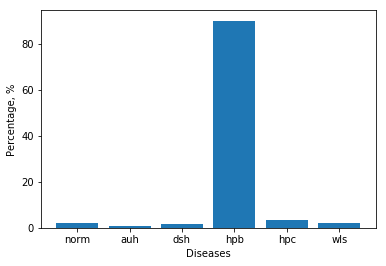

Accuracy: 100.00%


In [7]:


X = glrlm_data.iloc[:, :-1]
Y = glrlm_data.iloc[:, -1]

test_size = 0.5

model = XGBClassifier()

acc = []
diseases = [
    "norm",
    "auh",
    "dsh",
    "hpb",
    "hpc",
    "wls"
]

dis_dict = {
    0: "norm",
    1: "auh",
    2: "dsh",
    3: "hpb",
    4: "hpc",
    5: "wls"
}
seed = 2
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)



model.fit(X, Y)

import pickle

pickle.dump(model, open('./data/models/xgb_glrlm.pickle.dat', 'wb'))


# for j in range(1):
#     r = random.randint(0, len(y_pred) - 1)

#     print("Real value -> ", dis_dict[int(Y[r])])
#     for idx, y in enumerate(y_pred[r]):
#         print('{} : {}%'.format(diseases[idx], y))
    
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)

y_pred = model.predict_proba(X)
print(y_pred[0])

acc.append(accuracy)

ax = plt.subplot(111)
print(Y[89])
ax.bar(diseases, y_pred[89] * 100)
plt.xlabel('Diseases')
plt.ylabel('Percentage, %')
plt.show()
print("Accuracy: %.2f%%" % (accuracy * 100.0))


In [46]:

dataset.head()

,Unnamed: 0,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Spacing,...,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,data_source,diagnosis_code
0,0,2.1.2,1.14.2,1.2.0,0.5.2,3.6.8,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},532c2722ef4f92d11ceb0b1bb85f172440374e50,"(1.0, 1.0, 1.0)",...,8.161551,51.714241,418.881804,7.374962,0.147512,0.040513,0.334705,0.007213,norm0,0
1,1,2.1.2,1.14.2,1.2.0,0.5.2,3.6.8,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},81c154e43651cc2312ea4c01d87687bb956d30ea,"(1.0, 1.0, 1.0)",...,4.210489,62.732759,255.257902,15.737328,0.265226,0.035035,0.150014,0.015960,norm1,0
2,2,2.1.2,1.14.2,1.2.0,0.5.2,3.6.8,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},cf9eccc619d960da1f02d899f508ac46765b8c2b,"(1.0, 1.0, 1.0)",...,8.213710,46.086406,361.819700,6.974095,0.151106,0.048266,0.435101,0.008119,norm2,0
3,3,2.1.2,1.14.2,1.2.0,0.5.2,3.6.8,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},14883c60a74c7fec46aa2200e4ed5e56724740a3,"(1.0, 1.0, 1.0)",...,5.889325,54.723312,309.878431,11.317346,0.207536,0.032941,0.206172,0.008569,norm3,0
4,4,2.1.2,1.14.2,1.2.0,0.5.2,3.6.8,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},e2b4acbbf250bcc251d4718fc509438bb546e57e,"(1.0, 1.0, 1.0)",...,4.435496,60.235423,253.794825,16.265531,0.280230,0.034897,0.166367,0.014343,norm4,0


In [27]:
# dataset = pd.read_csv('./datasets/glrlm_0_sep_diseases.csv', sep=',', index_col=0).sample(frac=1)
# dataset = dataset[dataset['isPatho'] <= 1]
X = glrlm_data.iloc[:, :-1]
Y = glrlm_data.iloc[:, -1]
# print(X)
seed = 123
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



Accuracy: 75.00%


In [29]:
from sklearn import svm
# dataset = pd.read_csv('./datasets/glrlm_0_sep_diseases.csv', sep=',', index_col=0).sample(frac=1)
# dataset = dataset[dataset['isPatho'] <= 1]

X = glrlm_data.iloc[:, 1:-1]
Y = glrlm_data.iloc[:, -1]
seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)
accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.18%


In [ ]:
predicted = clf.predict(X_test)

def calc_accuracy(predicted, y_test):
    if len(predicted) != len(y_test):
        print("Function parameters must be the same size!")
        return

    true_answers = sum(int(predicted[i] == y_test[i]) for i in range(len(y_test)))
    
    return float(true_answers/float(len(y_test)))

calc_accuracy(predicted, y_test.values)


In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('./datasets/glrlm_0_unit.csv', sep=',', index_col=0).sample(frac=1)

seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
svc = svm.SVC(kernel='linear', gamma=.004, C=100)
svc.fit(X_train, y_train)

NameError: name 'X' is not defined

In [ ]:
dataset = pd.read_csv('./datasets/glrlm_0_unit.csv', sep=',', index_col=0).sample(frac=1)
X = dataset.iloc[:, 1:-1]
Y = dataset.iloc[:, -1]

seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
clf = svm.SVC(gamma='scale')
clf.fit(X, y)
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train) 

In [ ]:
X_train